<a href="https://colab.research.google.com/github/yin00406/Awesome-Precision-Agriculture/blob/master/ML_AG_18%3A%20Use%20Case%3A%20Creating%20a%20productivity%20mapping%20with%20regression%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Geospatial Data Analysis for Precision Agriculture

Author: João Otavio Nascimento Firigato

email: joaootavionf007@gmail.com

LinkedIn: https://www.linkedin.com/in/jo%C3%A3o-otavio-firigato-4876b3aa/


## First instructions:

✅ Access the link to join our private WhatsApp community for students: https://chat.whatsapp.com/HqajbNu0Z0U8RDZMSDFbMI


❗ It is important to access the Whatsapp Group to get the Colab Notebooks, as the PDF files are protected from text copying.



# Use Case: Creating a productivity mapping with regression models


In this example, we will create a regression model to predict productivity values ​​from field data, creating a productivity map

Link: https://drive.google.com/drive/folders/1EcMV3GWIDQvG_d5DIoe-wX_hfePmdD1X?usp=sharing

Let's start by connecting Drive and importing the functions and libraries:





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

We will use some csvs that contain sampled points:

In [ ]:
path_1 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field1.csv'
path_2 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field2.csv'
path_3 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field3.csv'
path_4 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field4.csv'
path_9 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field9.csv'
path_11 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/cleaned/field11.csv'

In [ ]:
df_1 = pd.read_csv(path_1)
df_2 = pd.read_csv(path_2)
df_3 = pd.read_csv(path_3)
df_4 = pd.read_csv(path_4)
df_9 = pd.read_csv(path_9)
df_11 = pd.read_csv(path_11)

In [ ]:
df_1

,X,Y,timestamp,moisture,speed,width,yield,yield (bu/ac)
0,440814.7634,5018681.069,2021-11-07T00:59:58,24.5,2.011364,20.01,2637.357422,47.095668
1,440815.0797,5018680.223,2021-11-07T00:59:59,24.6,2.011364,20.01,3884.949951,69.374106
2,440815.4099,5018679.348,2021-11-07T01:00:00,24.4,2.100000,20.01,5058.772461,90.335223
3,440815.7818,5018678.417,2021-11-07T01:00:01,23.9,2.236364,20.01,5797.845215,103.532950
4,440816.1677,5018677.472,2021-11-07T01:00:02,23.5,2.304545,20.01,6355.581543,113.492528
...,...,...,...,...,...,...,...,...
623,440818.2944,5018627.597,2021-11-07T01:26:27,22.5,5.863636,14.99,5454.380859,97.399658
624,440817.0329,5018629.885,2021-11-07T01:26:28,22.5,5.884091,14.99,6300.145996,112.502607
625,440815.7433,5018632.188,2021-11-07T01:26:29,22.5,5.884091,14.99,6979.573242,124.635237
626,440814.4818,5018634.476,2021-11-07T01:26:30,22.5,5.863636,14.99,7251.847168,129.497271


Using the X and Y coordinates, let's convert to a GeoDataFrame:

In [ ]:
gdf_1 = gpd.GeoDataFrame(df_1, geometry=gpd.points_from_xy(df_1.X, df_1.Y), crs="EPSG:32618")
gdf_2 = gpd.GeoDataFrame(df_2, geometry=gpd.points_from_xy(df_2.X, df_2.Y), crs="EPSG:32618")
gdf_3 = gpd.GeoDataFrame(df_3, geometry=gpd.points_from_xy(df_3.X, df_3.Y), crs="EPSG:32618")
gdf_4 = gpd.GeoDataFrame(df_4, geometry=gpd.points_from_xy(df_4.X, df_4.Y), crs="EPSG:32618")
gdf_9 = gpd.GeoDataFrame(df_9, geometry=gpd.points_from_xy(df_9.X, df_9.Y), crs="EPSG:32618")
gdf_11 = gpd.GeoDataFrame(df_11, geometry=gpd.points_from_xy(df_11.X, df_11.Y), crs="EPSG:32618")

<Axes: >

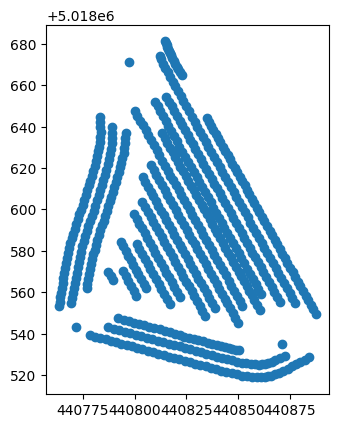

In [ ]:
gdf_1.plot()

Let's join the GeoDataFrames:

In [ ]:
gdf_full = pd.concat([gdf_1, gdf_2, gdf_3, gdf_4, gdf_9, gdf_11])

To generate the model, we will remove some unnecessary columns:

In [ ]:
gdf_full = gdf_full.drop(columns=['X','Y', 'timestamp', 'yield'])

In [ ]:
gdf_full.describe()

,moisture,speed,width,yield (bu/ac)
count,12499.000000,12499.000000,12499.000000,628.000000
mean,22.294632,5.662404,19.227151,110.760493
std,1.997319,0.922355,2.718381,25.419559
min,18.000000,0.293182,1.510000,31.995695
25%,20.799999,5.481818,20.010000,96.067516
50%,22.299999,5.904545,20.010000,111.332611
75%,23.299999,6.218182,20.010000,129.140270
max,39.900002,7.786364,20.010000,178.590332


We will also remove data like Nan.

In [ ]:
gdf_full_clean = gdf_full.dropna()

In [ ]:
gdf_full_clean

,moisture,speed,width,yield (bu/ac),geometry
0,24.5,2.011364,20.01,47.095668,POINT (440814.763 5018681.069)
1,24.6,2.011364,20.01,69.374106,POINT (440815.08 5018680.223)
2,24.4,2.100000,20.01,90.335223,POINT (440815.41 5018679.348)
3,23.9,2.236364,20.01,103.532950,POINT (440815.782 5018678.417)
4,23.5,2.304545,20.01,113.492528,POINT (440816.168 5018677.472)
...,...,...,...,...,...
623,22.5,5.863636,14.99,97.399658,POINT (440818.294 5018627.597)
624,22.5,5.884091,14.99,112.502607,POINT (440817.033 5018629.885)
625,22.5,5.884091,14.99,124.635237,POINT (440815.743 5018632.188)
626,22.5,5.863636,14.99,129.497271,POINT (440814.482 5018634.476)


Let's present the correlation matrix between the variables and our target productivity variable.

In [ ]:
df_full = gdf_full_clean.drop(columns=['geometry'])

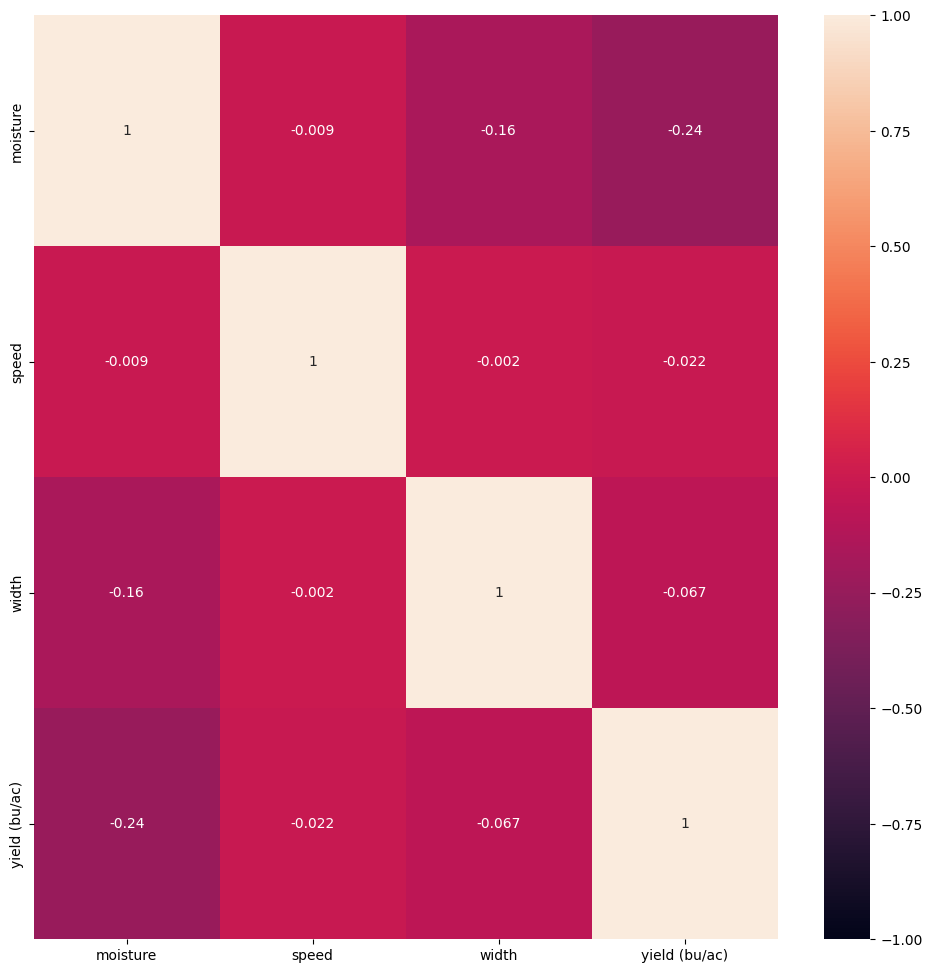

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_full.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

We created the variables X and Y, divided the data into training and testing, and applied the linear regression model:

In [ ]:
X = df_full.drop(columns=['yield (bu/ac)'])
y = df_full['yield (bu/ac)']

In [ ]:
y.shape

(628,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))

The coefficient for moisture is -4.7510840177326115
The coefficient for speed is 0.39174025974114945
The coefficient for width is -2.625808805808143


In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
regr.score(X_train, y_train)

0.07109569204025834

In [ ]:
regr.score(X_test, y_test)

0.046183624492167286

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error: 18.856889135777912
Mean Squared Error: 561.1883510247476
Root Mean Squared Error (RMSE): 23.689414324223964


After the model is created, we will apply the model to the complete set of data:

In [ ]:
gdf_to_pred = pd.concat([gdf_1, gdf_2, gdf_3, gdf_4, gdf_9, gdf_11])

In [ ]:
gdf_to_pred = gdf_to_pred.drop(columns=['X','Y', 'timestamp', 'yield','yield (bu/ac)', 'geometry'])

In [ ]:
full_pred = regr.predict(gdf_to_pred)

In [ ]:
gdf_to_pred['yield (bu/ac) predict'] = full_pred

In [ ]:
gdf_to_pred

,moisture,speed,width,yield (bu/ac) predict
0,24.500000,2.011364,20.01,97.047771
1,24.600000,2.011364,20.01,96.572661
2,24.400000,2.100000,20.01,97.557604
3,23.900000,2.236364,20.01,99.986565
4,23.500000,2.304545,20.01,101.913706
...,...,...,...,...
9189,21.299999,5.079545,20.01,113.453174
9190,21.400000,5.031818,20.01,112.959367
9191,21.500000,4.806818,20.01,112.396115
9192,22.000000,4.070455,18.01,114.983727


In [ ]:
gdf_full['yield_pred'] = gdf_to_pred['yield (bu/ac) predict']

<Axes: >

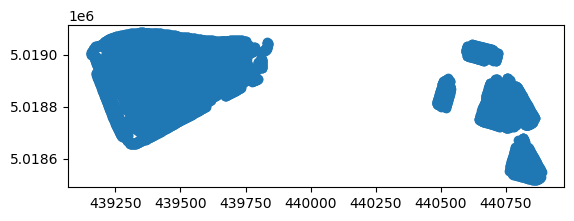

In [ ]:
gdf_full.plot()

In [ ]:
gdf_full_4326 = gdf_full.to_crs(epsg=4326)

In [ ]:
gdf_full_4326.to_file('gdf_full_4326.json')

Now let's use the field boundary polygons to generate a productivity map:

In [ ]:
path_boundary_1 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Demo Field 01_2021.shp'
path_boundary_2 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Demo Field 02_2021.shp'
path_boundary_3 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Demo Field 03_2021.shp'
path_boundary_4 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Demo Field 04_2021.shp'
path_boundary_6 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Demo Field 06_2021.shp'
path_boundary_11 = '/content/drive/MyDrive/Datasets_AG/Corn_yield_pred/Fields/Smart Farm Field 11_2021.shp'

In [ ]:
gdf_boundary_1 = gpd.read_file(path_boundary_1)
gdf_boundary_2 = gpd.read_file(path_boundary_2)
gdf_boundary_3 = gpd.read_file(path_boundary_3)
gdf_boundary_4 = gpd.read_file(path_boundary_4)
gdf_boundary_6 = gpd.read_file(path_boundary_6)
gdf_boundary_11 = gpd.read_file(path_boundary_11)

In [ ]:
gdf_boundary_full = pd.concat([gdf_boundary_1, gdf_boundary_2, gdf_boundary_3, gdf_boundary_4, gdf_boundary_6, gdf_boundary_11])

<Axes: >

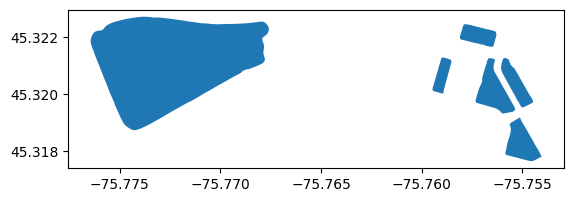

In [ ]:
gdf_boundary_full.plot()

As we have the predicted productivity points, we will interpolate the data using IDW and then crop the image with the limits:

In [ ]:
from osgeo import gdal
from osgeo import ogr

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.3 MB/s eta 0:00:00


In [ ]:
from rasterio.mask import mask
import rasterio

In [ ]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

def clip_raster(path_to_clip,path_to_save,gdf_lote):
    with rasterio.open(path_to_clip) as dataset:
      gdf_AOI = gdf_lote.to_crs(dataset.crs.to_dict()['init'])
    coords = getFeatures(gdf_AOI)
    with rasterio.open(path_to_clip) as src:
      out_img, out_transform = mask(dataset=src, shapes=coords, crop=True, nodata=0)
      out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                        "height": out_img.shape[1],
                        "width": out_img.shape[2],
                        "compress":'lzw',
                        "nodata": 0,
                        "transform": out_transform})
    with rasterio.open(path_to_save, "w", **out_meta) as dest:
        dest.write(out_img)
    del out_img

In [ ]:
gdf_boundary_full.total_bounds

array([-75.77644738,  45.3176564 , -75.75404635,  45.32269778])

In [ ]:
pts = layer = None
idw = gdal.Grid("/content/interpolate_idw_Yield.tif", "/content/gdf_full_4326.json", zfield="yield_pred",
               algorithm = "invdist:power=3.0", outputBounds = gdf_boundary_full.total_bounds,
               width = 3000, height = 1000)
idw = None

In [ ]:
gdf_boundary_full = gdf_boundary_full.dissolve()

In [ ]:
clip_raster('/content/interpolate_idw_Yield.tif','/content/interpolate_idw_Yield_clip.tif',gdf_boundary_full)

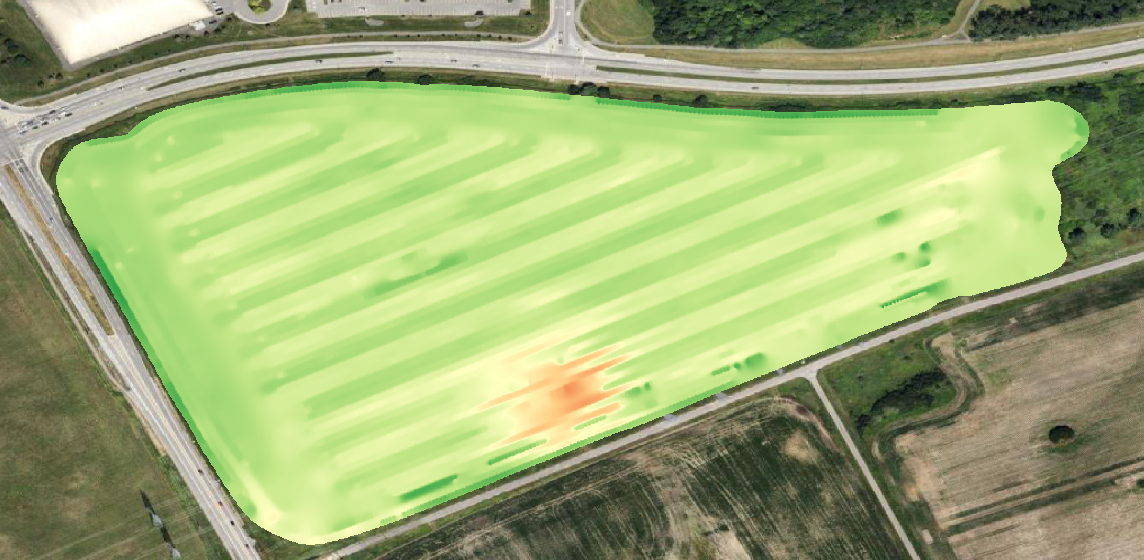

Let's now reclassify the image into 5 classes using equal division intervals between the minimum and maximum value:

In [ ]:
src = rasterio.open('/content/interpolate_idw_Yield_clip.tif')

In [ ]:
img = src.read()

In [ ]:
img_flat = img.flatten()

Let's obtain the minimum and maximum values ​​disregarding the zero values.

In [ ]:
min_value = img_flat[img_flat != 0].min()

In [ ]:
max_value = img_flat.max()

In [ ]:
min_value

23.73309398944165

In [ ]:
max_value

161.1242186211576

Let's apply the histogram and divide it into 5 intervals:

In [ ]:
hist_img = np.histogram(img_flat[img_flat != 0], bins = 5)

In [ ]:
hist_img[1]

array([ 23.73309399,  51.21131892,  78.68954384, 106.16776877,
       133.64599369, 161.12421862])

In [ ]:
new_img = img.copy()

Now we apply the split to the entire image and then save it to a raster file:

In [ ]:
new_img[np.where(img < hist_img[1][0])] = 0
new_img[np.where((hist_img[1][0] <= img) & (img < hist_img[1][1])) ] = 1
new_img[np.where((hist_img[1][1] <= img) & (img < hist_img[1][2])) ] = 2
new_img[np.where((hist_img[1][2] <= img) & (img < hist_img[1][3])) ] = 3
new_img[np.where((hist_img[1][3] <= img) & (img < hist_img[1][4])) ] = 4
new_img[np.where((img > hist_img[1][4])) ] = 5

In [ ]:
np.unique(new_img)

array([0., 1., 2., 3., 4., 5.])

In [ ]:
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                        "compress":'lzw',
                        "nodata": 0})
with rasterio.open('/content/Reclassify_idw_Yield.tif', "w", **out_meta) as dest:
    dest.write(new_img)

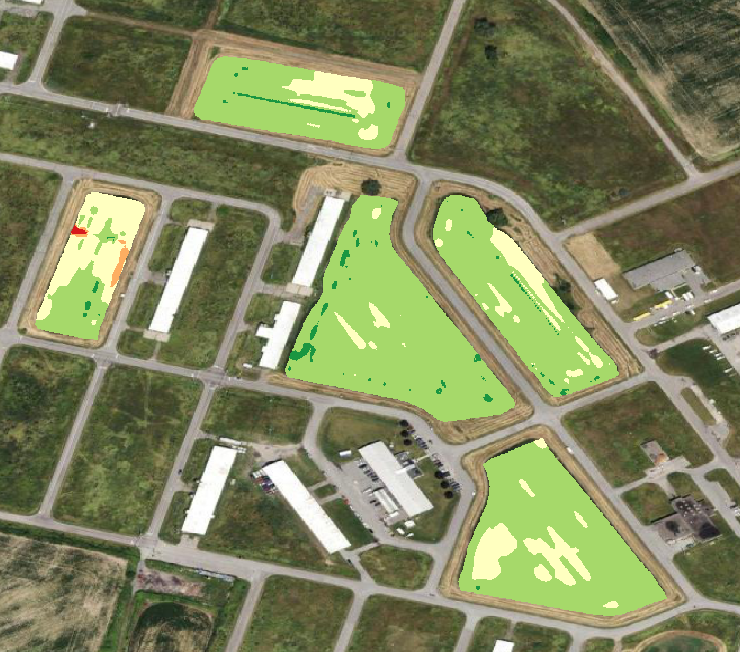

## Thank you! See you in the next Chapter!